# Purpose of notebook: to do 'descriptive statistics' of CNN and Fox News articles related to abortion + textexpressives package to measure linguistic stuff

# 3rd data step (not needed to proceed to step 4 tho)

#### OBS pick correct dataframes

In [1]:
# import/load packages

## install
%pip install pandas as pd
%pip install matplotlib
%pip install seaborn
%pip install textdescriptives
%pip install spacy


## import
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import textdescriptives as td
import spacy


ERROR: Could not find a version that satisfies the requirement as (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for as
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use 

In [2]:
# read csv
file_path = "/work/Bachelor/sample_data/dropbox/joined_dataframe/abortion_articled_joined_17_05.csv"
abortion_articled_joined_17_05 = pd.read_csv(file_path)
abortion_articled_joined_17_05

,textID,words,date,country,source,url,title,body
0,18398688,2491,17-05-12,US,CNN,http://www.cnn.com/2017/05/12/health/soundtrac...,Honoring the soundtrack of my mother's life,Chat with us in Facebook Messenger. Find out w...
1,18460895,590,17-05-15,US,CNN,http://www.cnn.com/2017/05/15/opinions/trump-r...,Psaki: Trump is destroying the trust of our al...,"If allies pull back on intelligence sharing, U..."


## Number of abortion related articles

In [3]:
# CNN
cnn_count = len(abortion_articled_joined_17_05[abortion_articled_joined_17_05['source'] == 'CNN'])
cnn_count

2

In [4]:
# Fox News
fox_count = len(abortion_articled_joined_17_05[abortion_articled_joined_17_05['source'] == 'Fox News'])
fox_count

0

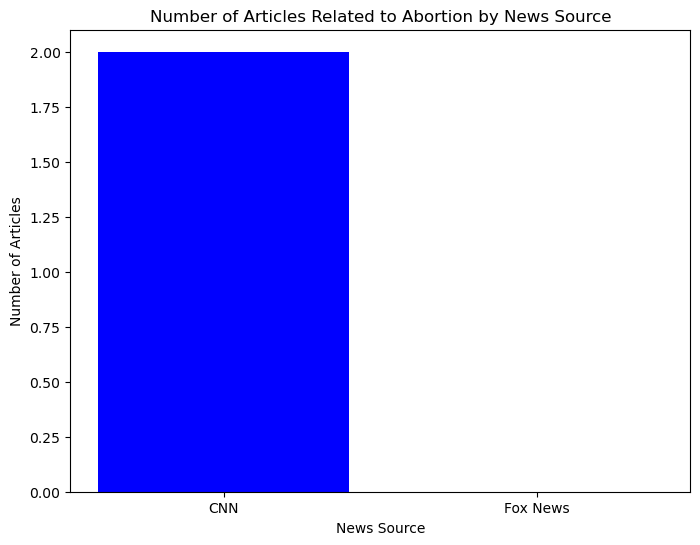

In [5]:
# prepare data for plotting
sources = ['CNN', 'Fox News']
counts = [cnn_count, fox_count]

# plot
plt.figure(figsize=(8, 6))
plt.bar(sources, counts, color=['blue', 'red'])
plt.xlabel('News Source')
plt.ylabel('Number of Articles')
plt.title('Number of Articles Related to Abortion by News Source')
plt.show()

## Number of abortion related articles over time👩‍🍳

In [6]:
# loading in the bigger dataframe so I can see how plotting it will look like - OBS use real data
file_path = "/work/Bachelor/sample_data/dropbox/joined_dataframe/CNN_Fox_joined_17_05.csv"
CNN_Fox_joined_17_05 = pd.read_csv(file_path)
CNN_Fox_joined_17_05

,textID,words,date,country,source,url,title,body
0,18209128,530,17-05-01,US,CNN,http://www.cnn.com/2017/05/01/middleeast/mosul...,Exclusive drone footage captures west Mosul in...,"In the raids, Chaim saw how ISIS fighters navi..."
1,18216117,906,17-05-01,US,CNN,http://www.cnn.com/2017/05/01/politics/republi...,GOP on verge of losing health care vote,There is no vote scheduled and it's unclear if...
2,18229187,1477,17-05-02,US,CNN,http://www.cnn.com/2017/05/02/politics/health-...,"It's do-or-die for Trump, GOP health care bill",House Speaker Paul Ryan can only afford to los...
3,18232148,226,17-05-02,US,CNN,http://www.cnn.com/2017/05/02/us/trnd---mariju...,Man tries to smuggle 67 pounds of pot into the...,Chat with us in Facebook Messenger. Find out w...
4,18232776,582,17-05-02,US,CNN,http://www.cnn.com/2017/05/02/politics/hillary...,Hillary Clinton just delivered a stunning indi...,( CNN ) Hillary Clinton had kept a purposely l...
...,...,...,...,...,...,...,...,...
140,18700902,131,17-05-29,US,Fox News,http://www.foxnews.com/politics/2017/05/29/pre...,President Trump lays wreath at the Tomb of the...,President Trump visited Arlington National Cem...
141,18702549,471,17-05-29,US,Fox News,http://www.foxnews.com/opinion/2017/05/29/this...,This Memorial Day meet some of the young Ameri...,In recent days we have seen shameful images of...
142,18709258,290,17-05-29,US,Fox News,http://nation.foxnews.com/2017/05/29/impeachy-...,The Impeachy Keen Political Posturing of Hilla...,Although the choking-at-the-podium gaffe was q...
143,18711656,647,17-05-30,US,Fox News,http://www.foxnews.com/politics/2017/05/30/as-...,"As the media target Jared Kushner, is the Sens...","In a matter of mere days, Jared Kushner has be..."


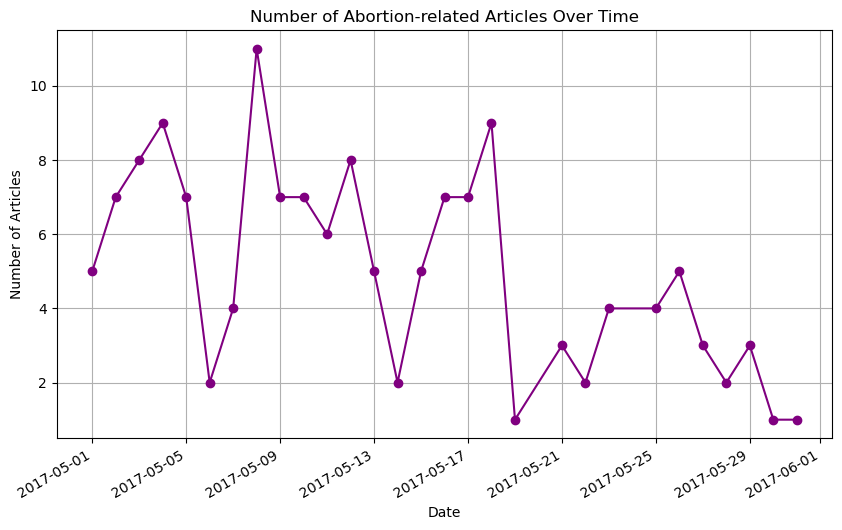

In [7]:
# Convert the 'date' column to datetime format
CNN_Fox_joined_17_05['date'] = pd.to_datetime(CNN_Fox_joined_17_05['date'], format='%y-%m-%d')

# Count the number of articles per date
articles_per_day = CNN_Fox_joined_17_05.groupby('date').size()

# Plotting
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='line', marker='o', color='purple')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Number of Abortion-related Articles Over Time')
plt.grid(True)
plt.show()

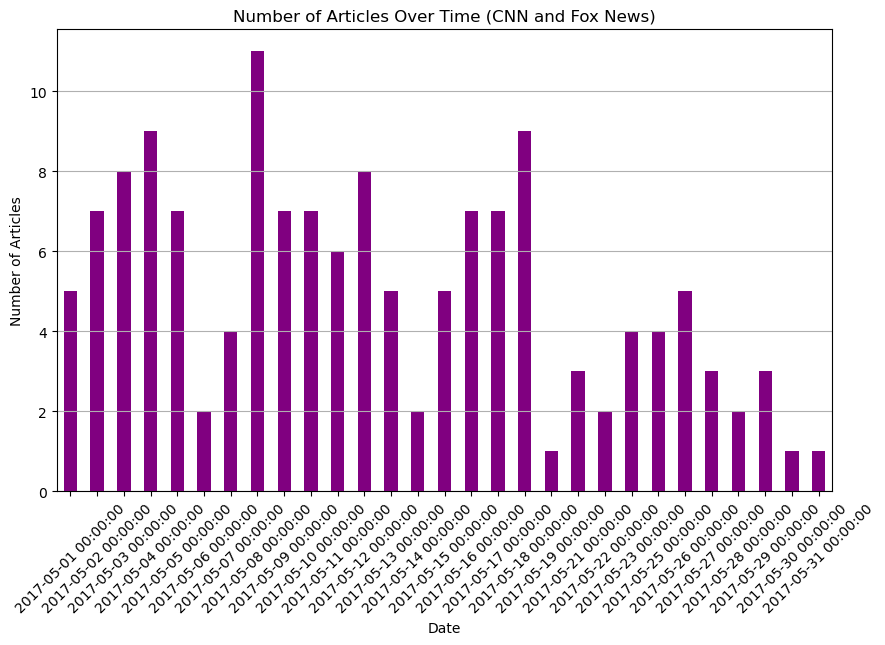

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'date' column to datetime format
CNN_Fox_joined_17_05['date'] = pd.to_datetime(CNN_Fox_joined_17_05['date'], format='%y-%m-%d')

# Count the number of articles per date
articles_per_day = CNN_Fox_joined_17_05['date'].value_counts().sort_index()

# Plotting as a bar plot
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='bar', color='purple')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Number of Articles Over Time (CNN and Fox News)')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid(axis='y')
plt.show()


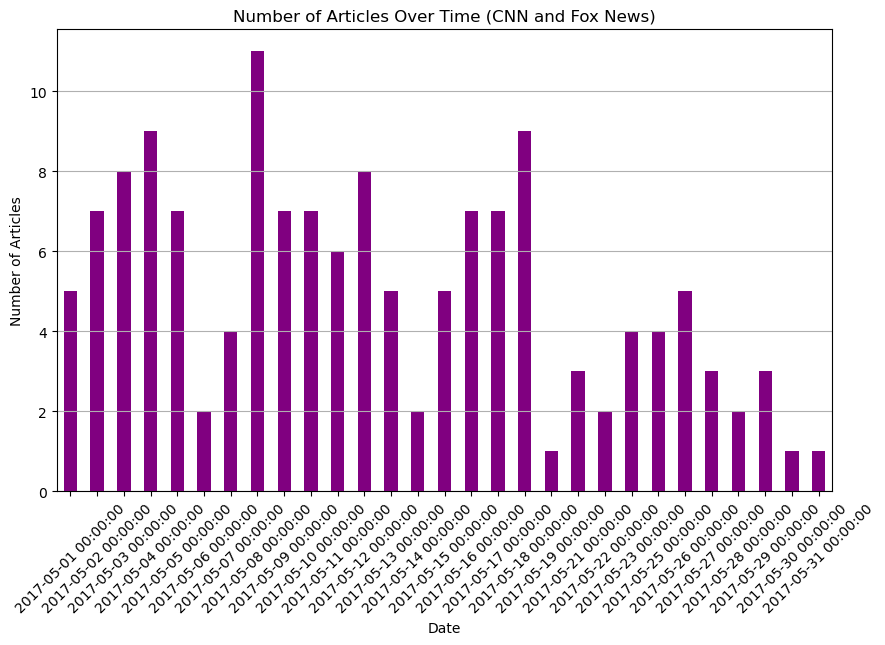

In [8]:
import matplotlib.pyplot as plt

# Count articles per date using the original string format
articles_per_day = CNN_Fox_joined_17_05['date'].value_counts().sort_index()

# Plotting as a bar plot
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='bar', color='purple')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Number of Articles Over Time (CNN and Fox News)')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid(axis='y')
plt.show()


In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'date' column to datetime format
CNN_Fox_joined_17_05['date'] = pd.to_datetime(CNN_Fox_joined_17_05['date'], format='%y-%m-%d')

# Set the date as the index for easier resampling
CNN_Fox_joined_17_05.set_index('date', inplace=True)

# Resample to count articles by month
articles_per_month = CNN_Fox_joined_17_05.resample('M').size()

# Plotting
plt.figure(figsize=(10, 6))
articles_per_month.plot(kind='line', marker='o', color='purple')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Number of Articles Over Time (Grouped by Month)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


KeyError: 'date'

## Length of articles👩‍🍳

In [ ]:
#plt.figure(figsize=(14,6))
#sns.kdeplot(data=CNN_Fox_joined_17_05, x=CNN_Fox_joined_17_05['length'], hue=df['type'])
#plt.title('Distribution of Articles Length in each news category', color='black', fontsize=14)
#plt.xlabel('Length of Articles', color='black', fontsize=14)
#plt.ylabel('Density', color='black', fontsize=14)
#plt.tight_layout()
#plt.show()

In [9]:
# mean length of all articles (characters)
mean_character_length = CNN_Fox_joined_17_05['body'].apply(len).mean()
print(mean_character_length)

3724.8758620689655


In [15]:
# mean length of all articles (words)
mean_word_length = CNN_Fox_joined_17_05['body'].apply(lambda x: len(x.split())).mean()
print(mean_word_length)

628.6068965517242


In [16]:
# mean length of CNN articles (words)
mean_word_length_CNN = CNN_Fox_joined_17_05[CNN_Fox_joined_17_05['source'] == "CNN"]['body'].apply(lambda x: len(x.split())).mean()
print(mean_word_length)

866.972972972973


In [17]:
# mean length of Fox News articles (words)
mean_word_length_Fox = CNN_Fox_joined_17_05[CNN_Fox_joined_17_05['source'] == "Fox News"]['body'].apply(lambda x: len(x.split())).mean()
print(mean_word_length)

380.16901408450707


# textedescriptives package - used on CNN_Fox_joined_17_05

In [3]:
# get a list of available metrics
available_metrics = td.get_valid_metrics()
print(available_metrics)

{'information_theory', 'readability', 'descriptive_stats', 'coherence', 'quality', 'dependency_distance', 'all', 'pos_proportions'}


In [4]:
# load your favourite spacy model (remember to install it first using e.g. `python -m spacy download en_core_web_sm`) - Idk what happens here tbh
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("textdescriptives/all") 

In [11]:
# Process each entry in the 'body' column
results = [td.extract_df(nlp(text)) for text in CNN_Fox_joined_17_05["body"]]

# Combine the extracted metrics into a single DataFrame
descriptives_results_df = pd.concat(results, ignore_index=True)

# add textID as the first column
descriptives_results_df.insert(0, 'textID', CNN_Fox_joined_17_05['textID'].values)

# add source as the second column
descriptives_results_df.insert(1, 'source', CNN_Fox_joined_17_05['source'].values)

# Display or save the results
descriptives_results_df

,textID,source,text,entropy,perplexity,per_word_perplexity,flesch_reading_ease,flesch_kincaid_grade,smog,gunning_fog,...,pos_prop_NOUN,pos_prop_NUM,pos_prop_PART,pos_prop_PRON,pos_prop_PROPN,pos_prop_PUNCT,pos_prop_SCONJ,pos_prop_SYM,pos_prop_VERB,pos_prop_X
0,18209128,CNN,"In the raids, Chaim saw how ISIS fighters navi...",16.994091,2.401265e+07,3.854358e+04,66.964725,9.568127,11.552085,12.919744,...,0.170144,0.012841,0.030498,0.057785,0.107544,0.144462,0.016051,0.000000,0.120385,0.000000
1,18216117,CNN,There is no vote scheduled and it's unclear if...,30.377437,1.558666e+13,1.487277e+10,69.573153,8.697149,11.347849,12.279070,...,0.135496,0.006679,0.032443,0.062977,0.128817,0.127863,0.018130,0.000000,0.119275,0.007634
2,18229187,CNN,House Speaker Paul Ryan can only afford to los...,46.964730,2.491856e+20,1.451285e+17,65.123128,10.058090,11.744167,13.312930,...,0.180547,0.013978,0.036109,0.044846,0.085614,0.126966,0.017472,0.000582,0.107164,0.010483
3,18232148,CNN,Chat with us in Facebook Messenger. Find out w...,7.200462,1.340050e+03,5.514609e+00,83.069903,5.328183,9.042354,8.798336,...,0.185185,0.012346,0.028807,0.069959,0.049383,0.139918,0.024691,0.004115,0.094650,0.000000
4,18232776,CNN,( CNN ) Hillary Clinton had kept a purposely l...,20.086480,5.289900e+08,7.779264e+05,66.716500,9.518500,11.288534,12.602857,...,0.145588,0.014706,0.027941,0.080882,0.089706,0.155882,0.016176,0.000000,0.095588,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,18700902,Fox News,President Trump visited Arlington National Cem...,3.881343,4.848927e+01,3.414737e-01,61.448471,9.946890,13.023867,14.135958,...,0.112676,0.014085,0.014085,0.035211,0.295775,0.105634,0.007042,0.000000,0.084507,0.000000
141,18702549,Fox News,In recent days we have seen shameful images of...,13.893367,1.080968e+06,2.149041e+03,68.889347,9.203010,12.161745,13.414273,...,0.145129,0.005964,0.015905,0.099404,0.147117,0.101392,0.013917,0.000000,0.113320,0.000000
142,18709258,Fox News,Although the choking-at-the-podium gaffe was q...,9.620633,1.507260e+04,4.526305e+01,54.967667,10.924086,13.149920,14.319382,...,0.204204,0.027027,0.021021,0.033033,0.099099,0.144144,0.021021,0.000000,0.072072,0.000000
143,18711656,Fox News,"In a matter of mere days, Jared Kushner has be...",21.757826,2.813869e+09,3.849343e+06,68.841692,8.302142,10.832166,11.368577,...,0.155951,0.001368,0.025992,0.069767,0.082079,0.129959,0.020520,0.000000,0.097127,0.001368


In [12]:
# save csv
output_file_path = "/work/Bachelor/sample_data/dropbox/joined_dataframe/descriptives_results_joined_17_05.csv"
descriptives_results_df.to_csv(output_file_path, index=False, encoding='utf-8')